# Introduction to Machine Learning

Presented by [Charles Tapley Hoyt](https://github.com/cthoyt) on Tuesday, April 23rd, 2019 for Life Sciences Knowledge Discovery.

Find this notebook on [GitHub](https://github.com/cthoyt/notebooks/blob/master/LSKD2019/LSKD%20Introduction%20to%20Machine%20Learning%202019.ipynb) or http://bit.ly/lskd-2019-ml-part1-notebook and view on [NBViewer](https://nbviewer.jupyter.org/github/cthoyt/notebooks/blob/master/LSKD2019/LSKD%20Introduction%20to%20Machine%20Learning%202019.ipynb).

![XKCD on Machine Learning](https://imgs.xkcd.com/comics/machine_learning.png)

Reference: https://xkcd.com/1838/

## What is Machine Learning?

- Capture the underlying patterns observed in data in a model
- Generate predictions about new data


### Types

- Supervised
  - Data is labeled
- Unsupervised
  - Data is unlabeled
- Semi-Supervised
  - Some data is labeled
- Reinforcement
  - Supervised + feedback

## Tasks in Machine Learning

1. Density Estimation
  - Identify structure and distribution underlying data
2. Classification
  - Assign labels
3. Anomaly/Novelty Detection
  - Find outliers
4. Dimensionality Reduction
  - Identify structure in data and build simpler representation
5. Clustering
  - Find groups in data
6. Regression
  - Predict values

## Notebook Setup

### Imports

Organize imports by system imports, third party imports, then local imports.

In [1]:
import sys
import time

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn
import sklearn.datasets
import sklearn.linear_model
import sklearn.metrics
import sklearn.model_selection
import sklearn.neighbors
import sklearn.neural_network
import sklearn.svm
import sklearn.tree
import sklearn.utils.multiclass
from IPython.display import HTML, Markdown

### Jupyter Notebook Configuration

Tell `matplotlib` to make figures inside the notebook

In [2]:
%matplotlib inline

Tell `matplotlib` to make figures with vector graphics

In [3]:
%config InlineBackend.figure_formats = ['svg']

Set the theme for `matplotlib` and `seaborn`

In [4]:
sns.set(style="darkgrid")

### Environmental Provenance

What version of Python was used?

In [5]:
print(sys.version)

3.7.3 (default, Mar 27 2019, 09:23:15) 
[Clang 10.0.1 (clang-1001.0.46.3)]


When was this notebook last run?

In [6]:
print(time.asctime())

Tue Apr 23 09:49:30 2019


In [7]:
print(sklearn.__version__)

0.20.3


## Classification

There are several tasks in machine learning. We'll start with one of the most simple - classification.

Load the [breast cancer](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html) data from `sklearn`.

In [8]:
breast_cancer_data = sklearn.datasets.load_breast_cancer()

Investigate the struture of the object returned

In [9]:
breast_cancer_data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

The goal of this data set was to use the shape of the nuclei of cells to predict whether the cells were malignnant or benign. We can learn more from `print(breast_cancer_data.DESCR)`.

<img src="nuclei.png" width="350">

Construct a `pd.DataFrame` from the data and its feature names.

In [10]:
breast_cancer_df = pd.DataFrame(
    breast_cancer_data.data, 
    columns=breast_cancer_data.feature_names,
)

Augument the dataframe with the labels for later use in visualization with `matplotlib` and `seaborn`.

In [11]:
# Add a label column using the actual labels instead of numbers
breast_cancer_df['label'] = pd.Series([
    breast_cancer_data.target_names[label_index] 
    for label_index in breast_cancer_data.target
])

Peek at the first few rows of the dataframe.

In [12]:
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


## Understanding the Data

List the types of labels.

In [13]:
breast_cancer_df.label.unique()

array(['malignant', 'benign'], dtype=object)

Count the frequency of each label.

In [14]:
breast_cancer_df.label.value_counts()

benign       357
malignant    212
Name: label, dtype: int64

Plot the frequency of each label.

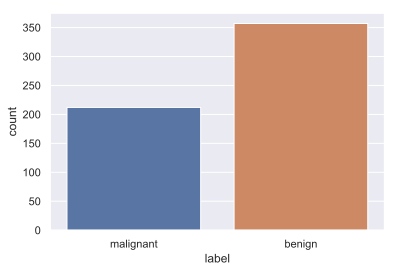

In [15]:
sns.countplot(x='label', data=breast_cancer_df)
plt.show()

Show statistics for all other measurements

In [16]:
breast_cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


### Univariate Density Estimation

Investigate the univariate distribution of each feature.

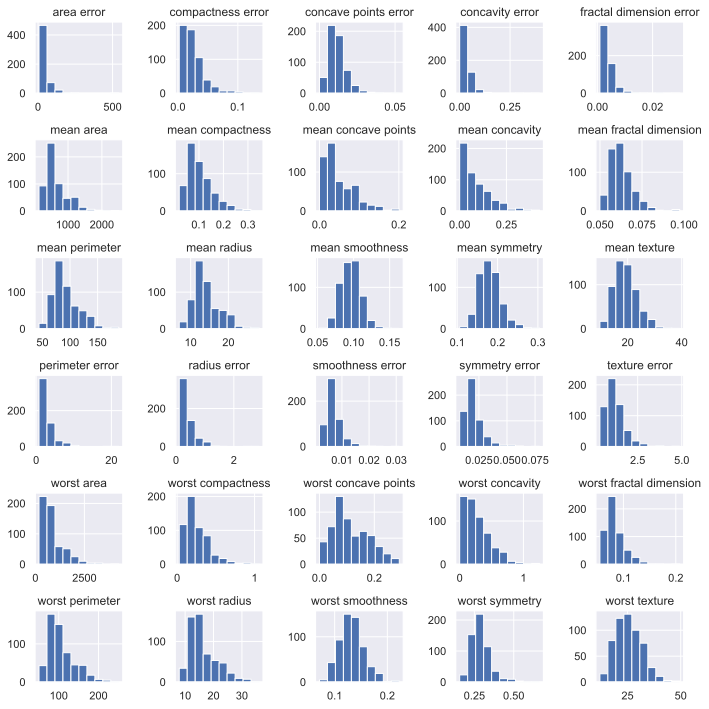

In [17]:
breast_cancer_df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

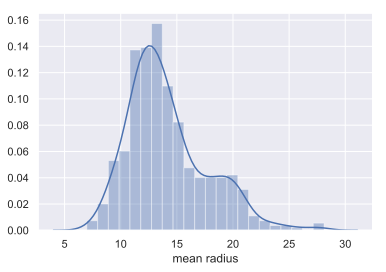

In [18]:
sns.distplot(breast_cancer_df['mean radius'])
plt.show()

### Multivariate Density Estimation

The bivariate investigation of small datasets is already difficult to visualize succinctly. Here, we're going to look at a few specific examples.


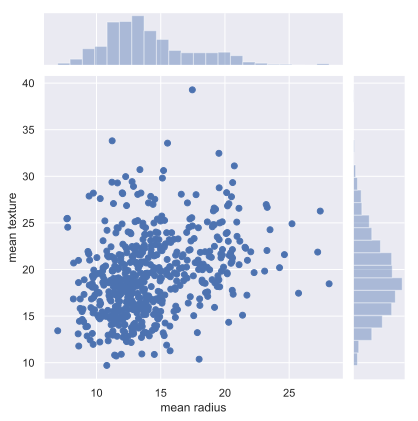

In [19]:
sns.jointplot(
    x='mean radius', 
    y='mean texture',
    data=breast_cancer_df,
    hu
)
plt.show()

Unfortunately, `seaborn` doesn't offer coloring by label in the `sns.jointplot` function. We'll fall back to `sns.scatterplot` to investigate two things:

1. Are features correlated?
2. How good is a feature (or pair of features) at separating the data by label?

In [20]:
breast_cancer_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


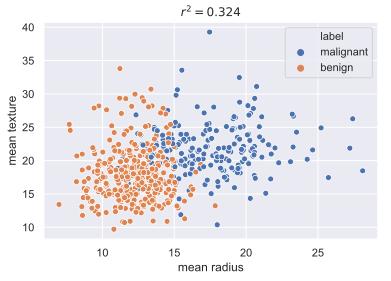

In [21]:
pearson, _ = scipy.stats.pearsonr(breast_cancer_df['mean radius'], breast_cancer_df['mean texture'])

sns.scatterplot(
    x='mean radius', 
    y='mean texture',
    data=breast_cancer_df,
    hue='label'
)
plt.title(f'$r^2={pearson:.3f}$')
plt.show()

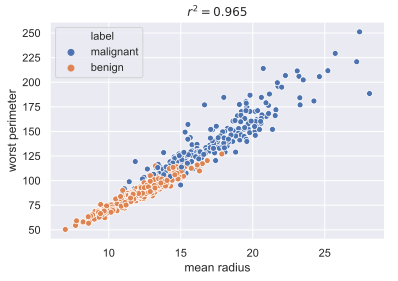

In [22]:
pearson, _ = scipy.stats.pearsonr(breast_cancer_df['mean radius'], breast_cancer_df['worst perimeter'])

sns.scatterplot(
    x='mean radius', 
    y='worst perimeter',
    data=breast_cancer_df,
    hue='label',
)
plt.title(f'$r^2={pearson:.3f}$')
plt.show()

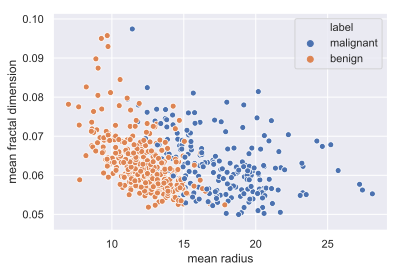

In [23]:
sns.scatterplot(
    x='mean radius', 
    y='mean fractal dimension',
    data=breast_cancer_df,
    hue='label',
)
plt.show()

## Classification

Prepare the data for classification by splitting randomly into test and training data.

In [24]:
X = breast_cancer_df[[
        column_name
        for column_name in breast_cancer_df.columns
        if column_name != 'label'
    ]]

y = breast_cancer_df['label']


X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

Build a logistic regression classifier.

In [25]:
logistic_regression = sklearn.linear_model.LogisticRegression(solver='liblinear')
logistic_regression

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Train the classifier.

In [26]:
logistic_regression.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Congratulations, you've done machine learning!

Use the classifier to make predictions on the test data.

In [27]:
y_pred = logistic_regression.predict(X_test)

Calculate a confusion matrix - how good were our predictions?

In [28]:
sklearn.metrics.confusion_matrix(y_test, y_pred, labels=['benign', 'malignant'])

array([[117,   4],
       [  4,  63]])

Confusion matrix, without normalization


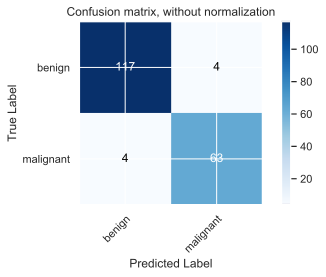

In [29]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True Label',
           xlabel='Predicted Label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

plot_confusion_matrix(y_test, y_pred, ['benign', 'malignant'])
plt.show()

Accuracy measures what percentage are we making the correct prediction. It isn't robust when the data isn't balanced.

In [30]:
accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
accuracy

0.9574468085106383

Precision measures how good positive predictions are

In [31]:
precision = sklearn.metrics.precision_score(y_test, y_pred, pos_label='benign')
precision

0.9669421487603306

Recall (i.e., sensitivity) measures how able was the algorithm can identify positives

In [32]:
recall = sklearn.metrics.recall_score(y_test, y_pred, pos_label='benign')
recall

0.9669421487603306

$F_1$ balances the precision and recall and is less suceptible to imbalanced data sets, but does not take into account the number of true negatives and is still lacking.

In [33]:
f1 = sklearn.metrics.f1_score(y_test, y_pred, pos_label='benign')
f1

0.9669421487603306

Matthew's correlation coefficient successfully balances all four measurements. It is also the most strict.

In [34]:
mcc = sklearn.metrics.matthews_corrcoef(y_test, y_pred)
mcc

0.9072406562230172

Print a quick summary

In [35]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      benign       0.97      0.97      0.97       121
   malignant       0.94      0.94      0.94        67

   micro avg       0.96      0.96      0.96       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.96      0.96      0.96       188



### Application of Other Classifiers

- K-Nearest Neighbors (`sklearn.neighbors.KNeighborsClassifier`)
- Epsilon-Nearest Neighbors (`sklearn.neighbors.RadiusNeighborsClassifier`)
- Linear Support Vector Machine Classifier (`sklearn.svm.LinearSVC`)
- General Support Vector Machine Classifier (`sklearn.svm.SVC`)
- Decision Tree (`sklearn.tree.DecisionTreeClassifier`)
- Single Later Perceptron (`sklearn.linear_model.Perceptron`)
- Multi-layer Perceptron (`sklearn.neural_network.MLPClassifier`)

Consider that each model has its own specific purpose and not all models are useful for all problems

In [36]:
clf = sklearn.neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
sklearn.metrics.matthews_corrcoef(y_test, clf.predict(X_test))

0.8960519681397894

In [37]:
clf = sklearn.tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
sklearn.metrics.matthews_corrcoef(y_test, clf.predict(X_test))

0.7845817328427156

In [38]:
clf = sklearn.linear_model.Perceptron()
clf.fit(X_train, y_train)
sklearn.metrics.matthews_corrcoef(y_test, clf.predict(X_test))

/Users/cthoyt/.virtualenvs/hbp/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8753108900435638

### Tuning Hyperparameters


Try adjusting the number of neighbors for K-Nearest Neighbors

In [39]:
param_grid = [
    {
        'n_neighbors': [1, 2, 4, 5, 6, 10, 15],
    }
]
clf = sklearn.model_selection.GridSearchCV(
    estimator=sklearn.neighbors.KNeighborsClassifier(),
    param_grid=param_grid,
    cv=5,
)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print(clf.best_estimator_)
print()
print(sklearn.metrics.classification_report(y_test, y_pred))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

              precision    recall  f1-score   support

      benign       0.97      0.96      0.96       121
   malignant       0.93      0.94      0.93        67

   micro avg       0.95      0.95      0.95       188
   macro avg       0.95      0.95      0.95       188
weighted avg       0.95      0.95      0.95       188



Try for generalized Support Vector Machine classifier (`sklearn.svm.SVC`).

In [40]:
clf = sklearn.svm.SVC(kernel='rbf', gamma=2, C=1.0)
clf.fit(X_train, y_train)
sklearn.metrics.matthews_corrcoef(y_test, clf.predict(X_test))

/Users/cthoyt/.virtualenvs/hbp/lib/python3.7/site-packages/sklearn/metrics/classification.py:543: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


0.0

Tomorrow:

- Generalization to multi-class classification
- Feature Engineering
  - Dimensionality Reduction
  - Feature Scaling